In [158]:
# Step 1: Import necessary libraries


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, cohen_kappa_score, f1_score, roc_curve

In [159]:
# Step 2: Load the dataset


data_file = r'C:\Users\MY HP\Desktop\ML_Prog\Flood_Features_Real.csv'  # Update this path to your file
df = pd.read_csv(data_file)  # Read the CSV file into a pandas DataFrame
df = df.reindex(np.random.permutation(df.index))  # Shuffle the rows of the dataset randomly
df.tail()  # Show the last few rows of the dataset to confirm it's loaded correctly

,ID,X_lon,Y_lat,Rank,Curvature_,Elevation_,Drainage_Den,Slope_R,TWI_R,Aspect_R,Rainfall,Population,Formality_,Housing_Den,LULC
463,464,9.835960,10.283224,1,-0.319395,595,0.00000,3.84828,6.12173,14.036,963.210,1,1,2,25
873,874,9.794850,10.286713,0,0.425860,604,0.98649,4.08095,6.06284,30.964,979.344,5,3,4,12
78,79,9.847725,10.332097,1,-0.106465,623,0.00000,3.76269,6.14429,277.125,947.194,5,1,2,1
126,127,9.827593,10.283274,1,-0.106465,584,1.34385,4.48589,5.96788,297.897,967.707,1,1,2,12
236,237,9.849497,10.357648,1,-0.212930,596,0.00000,2.72319,6.46830,-1.000,946.119,1,1,3,12


In [160]:
df.columns

Index(['ID', 'X_lon', 'Y_lat', 'Rank', 'Curvature_', 'Elevation_',
       'Drainage_Den', 'Slope_R', 'TWI_R', 'Aspect_R', 'Rainfall',
       'Population', 'Formality_', 'Housing_Den', 'LULC'],
      dtype='object')

## Define Feature Output

In [161]:


feature_cols = [
    'Curvature_', 'Elevation_',
       'Drainage_Den', 'Slope_R', 'TWI_R', 'Aspect_R', 'Rainfall',
       'Population', 'Formality_', 'Housing_Den', 'LULC'
]
# The target column (or label) that the model is predicting.

target_name = "Rank"  

## Data Preparation

In [162]:
#Data Preparations
# Step 1: Extract the feature columns and convert to NumPy array
X = df.loc[:, feature_cols]
X = np.asarray(X)

# Step 2: Standardize the features
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)


# Step 3: Extract the target column (labels)
y = df[target_name]

In [163]:
# Print the size of the feature matrix
print("Size of X (features):", X_scaled.shape)

# Step 2: Check the shape of the target data
print("Size of y (target):", y.shape)  # Print the size of the target data

Size of X (features): (1030, 11)
Size of y (target): (1030,)


## Devide Data into Training and Testing

In [173]:
# Split data into training and testing

train_ratio = 0.70
test_ratio = 0.30

# Step 5: Split the data into training testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_ratio)

# Print the sizes of the datasets
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 721
Testing set size: 309


## Train Random Forest

In [174]:
import random
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Step 1: Set global random seeds for repeatability
np.random.seed(352)
random.seed(352)

# Step 2: Create a Random Forest model with a fixed random state
rf_model = RandomForestClassifier(random_state=352)

# Step 3: Train the model on the training data
rf_model.fit(X_train, y_train)

# Print a confirmation message
print("Random Forest model has been trained, proceed with the evaluation.")

Random Forest model has been trained, proceed with the evaluation.


In [175]:
# Step 6: Train XGBoost model using training data
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

## Compute Metrics

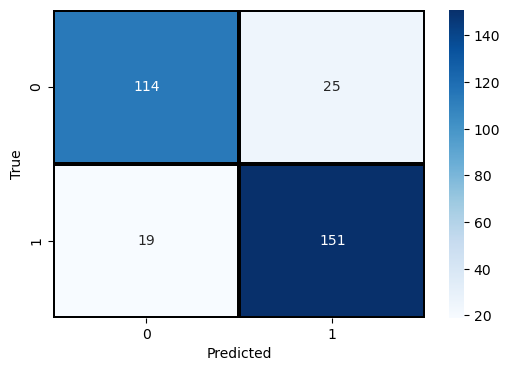

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Step 1: Predict labels for the test dataset
y_pred_1 = rf_model.predict(X_test)

# Step 2: Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_1)

# Step 3: Create a heatmap for the confusion matrix with a color legend and black cell outlines
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_, 
            linecolor='black', linewidths=1.5)  # Add black outlines

plt.xlabel('Predicted')
plt.ylabel('True')

# Step 4: Save the figure with high resolution
plt.savefig("RF_Confusion_matrix1.png", dpi=300, bbox_inches='tight')

# Step 5: Display the plot
plt.show()

In [178]:
# compute other metrics

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, cohen_kappa_score, classification_report, confusion_matrix

# Step 7: Compute and print various evaluation metrics on test data
y_pred = rf_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# ROC-AUC Score
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc}")

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

# Cohen's Kappa Score
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix to calculate Sensitivity and Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Sensitivity (Recall or True Positive Rate)
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity}")

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

Accuracy: 0.8576051779935275
ROC-AUC Score: 0.932924248836225
F1 Score: 0.8572692840534832
Cohen's Kappa: 0.711178145048222
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       139
           1       0.86      0.89      0.87       170

    accuracy                           0.86       309
   macro avg       0.86      0.85      0.86       309
weighted avg       0.86      0.86      0.86       309

Sensitivity: 0.888235294117647
Specificity: 0.8201438848920863


Area Under the Curve (AUC): 0.932924248836225


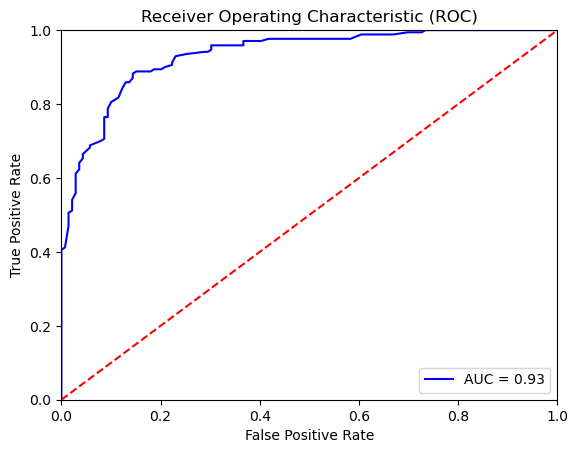

In [180]:
# Step 8: Calculate and print ROC AUC
y_pred_1_prob = rf_model.predict_proba(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_1_prob[:, 1], pos_label=rf_model.classes_[1])
roc_auc = metrics.auc(fpr, tpr)
print("Area Under the Curve (AUC):", roc_auc)



plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.show(show=False)
plt.savefig("ROC-Flood_Fresh1.png",dpi=300, bbox_inches='tight')

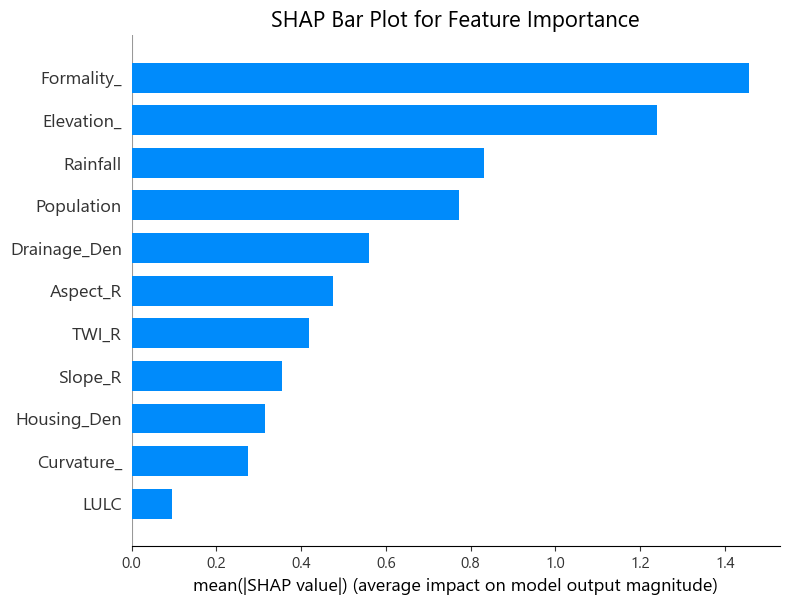

In [299]:
# Step 9: Plot SHAP Bar plot (global importance)
plt.figure(figsize=(6, 4))
shap.summary_plot(shap_values, X_train, feature_names=feature_cols, plot_type="bar", show=False)
plt.title("SHAP Bar Plot for Feature Importance", fontsize=16, color='black')
plt.savefig("SHAP Bar Plot.png", dpi=300, bbox_inches='tight')
plt.show()

feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_cols, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(8))

## Explainable AI

In [281]:
import shap  # package used to calculate SHAP values
import matplotlib.pyplot as plt

# Step 1: Initialize SHAP visualizations for notebook
shap.initjs()

# Step 2: Create SHAP explainer object based on the Random Forest model
explainer = shap.TreeExplainer(rf_model)

In [282]:
# Step 3: Calculate SHAP values for the training data
shap_values = explainer.shap_values(X_train)

# Step 4: Set plot font and styles for better readability
plt.rcParams["font.family"] = "Segoe UI"
plt.rcParams.update({'text.color': "black",  # Adjust color for better contrast
                     'axes.labelcolor': "black"})


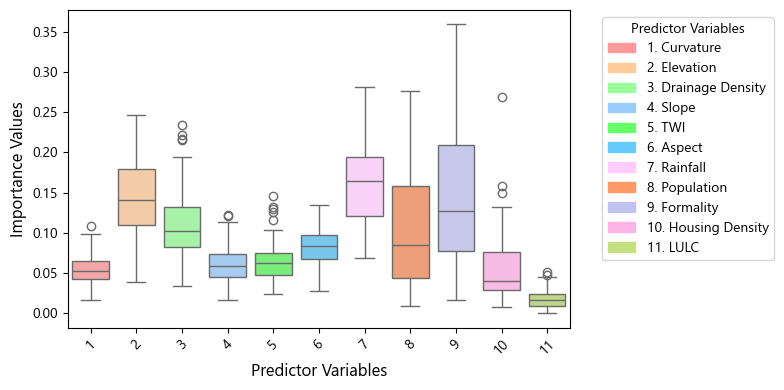

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Step 1: Extract feature importances from all trees in the Random Forest
tree_importances = np.array([tree.feature_importances_ for tree in rf_model.estimators_])

# Step 2: Convert to a DataFrame for easy plotting
importances_df = pd.DataFrame(tree_importances, columns=feature_cols)

# Step 3: Set custom colors for each predictor variable
box_colors = ['#ff9999', '#ffcc99', '#99ff99', '#99ccff', '#66ff66', '#66ccff', 
              '#ffccff', '#ff9966', '#c2c2f0', '#ffb3e6', '#c4e17f']

# Step 4: Create the box plot
plt.figure(figsize=(8, 4))
sns.boxplot(data=importances_df, palette=box_colors)

# Step 5: Add a legend with labels for each predictor variable
legend_labels = [
    '1. Curvature', '2. Elevation', '3. Drainage Density', '4. Slope',
    '5. TWI', '6. Aspect', '7. Rainfall', '8. Population',
    '9. Formality', '10. Housing Density', '11. LULC'
]
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=col) for col in box_colors],
           labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left', title='Predictor Variables')

# Step 6: Customize the plot appearance

plt.ylabel("Importance Values", fontsize=12)
plt.xlabel("Predictor Variables", fontsize=12)
plt.xticks(ticks=np.arange(len(feature_cols)), labels=[f'{i+1}' for i in range(len(feature_cols))], rotation=45)

# Step 7: Save the plot with high resolution (e.g., 300 dpi) and tight layout
plt.tight_layout()
plt.savefig("Feature_Iportance_boxplot.png", dpi=300, bbox_inches='tight')

# Step 8: Show the plot
plt.show()

## Prediction and Mapping

In [35]:
# Step 1: Load the new dataset for prediction
new_data_file = r'C:\Users\MY HP\Desktop\ML_Prog\Fishgrid_Flood.csv' # Replacewith your new dataset file path
new_df = pd.read_csv(new_data_file)


In [36]:
new_df.head

<bound method NDFrame.head of      FID  Latitude  Longitude  Curvature_  Elevation_  Drainage_Den   Slope_R  \
0      0   10.2467    9.75909    0.425860         636      0.000000  2.381790   
1      1   10.2467    9.76365    0.425860         637      0.000000  0.738945   
2      2   10.2466    9.76822   -0.212930         629      0.000000  0.660940   
3      3   10.2466    9.77279   -0.106465         624      0.007416  1.191410   
4      4   10.2466    9.77735   -0.638790         619      1.011800  3.762690   
..   ...       ...        ...         ...         ...           ...       ...   
645  653   10.3729    9.91467   -0.319395         568      0.000000  2.312140   
646  654   10.3776    9.83248   -0.638790         572      0.702505  1.401850   
647  655   10.3776    9.83704    0.212930         569      0.752718  3.554860   
648  656   10.3774    9.90098    0.000000         569      0.000000  1.651960   
649  657   10.3774    9.90555    0.319395         580      0.000000  0.738945  

In [37]:
# Step 2: Select the features for prediction
X_new = new_df.loc[:, feature_cols] # Ensure the new data has the correct␣feature columns
# Step 3: Convert features to a NumPy array
X_new = np.asarray(X_new)
# Step 4: Standardize the new data using the previously fitted scaler
scaler = preprocessing.StandardScaler().fit(X_new)
X_scaled_new = scaler.transform(X_new)
y = df[target_name]

In [38]:
#Step 5: Get prediction probabilities on the new data using the trained model
probabilities = rf_model.predict_proba(X_new)
# Step 6: Add the probabilities to the new DataFrame
# For binary classification, probabilities will have two columns: [P(class 0),␣P(class 1)]
new_df['Probability_Class_0'] = probabilities[:, 0] # Probability of class 0
new_df['Probability_Class_1'] = probabilities[:, 1] # Probability of class 1


In [39]:
# Step 7: Save the results (with probabilities) to a CSV file
output_file = r'C:\Users\MY HP\Desktop\ML_Prog\Flood_Probabilities.rf.csv' # Replace with your output file path
new_df.to_csv(output_file, index=False)
# Step 8: Print confirmation that the predictions have been saved
print(f"Predictions with probabilities saved to {output_file}")

Predictions with probabilities saved to C:\Users\MY HP\Desktop\ML_Prog\Flood_Probabilities.rf.csv


In [40]:
# Assuming `new_df` is your new data with the same features as during training
X_new = new_df[feature_cols].values  # Extract the features for prediction

# Use the previously fitted scaler (from the training phase) to transform the new data
X_new_scaled = scaler.transform(X_new)  # Important: Do NOT fit again, just transform

# Now you can make predictions on the scaled new data
probabilities = rf_model.predict_proba(X_new_scaled)

# Add the predicted probabilities back to your new DataFrame
new_df['Probability_Class_0'] = probabilities[:, 0]  # Probability of no flood (class 0)
new_df['Probability_Class_1'] = probabilities[:, 1]  # Probability of flood (class 1)

# You can also add the predicted class based on a threshold (e.g., 0.5)
new_df['Predicted_Class'] = (new_df['Probability_Class_1'] > 0.5).astype(int)

# Save or visualize the results
output_file = r'C:\Users\MY HP\Desktop\ML_Prog\Flood_Probabilities_rf1.csv'
new_df.to_csv(output_file, index=False)
print(f"Predictions with probabilities saved to {output_file}")

Predictions with probabilities saved to C:\Users\MY HP\Desktop\ML_Prog\Flood_Probabilities_rf1.csv


## XGBOOST Model

In [28]:
# Step 1: Import dependencies

import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report, confusion_matrix, cohen_kappa_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

## Read and Visualized data

In [29]:
# Step one read data
data_file = r'C:\Users\MY HP\Desktop\ML_Prog\Flood_Features_Real.csv'
df = pd.read_csv(data_file)

# Display the first few rows of the dataset
print("Data Overview:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Data Overview:
   ID     X_lon      Y_lat  Rank  Curvature_  Elevation_  Drainage_Den  \
0   1  9.808968  10.273930     1   -0.212930         592       2.60181   
1   2  9.809505  10.273910     1    0.319395         593       2.61650   
2   3  9.809384  10.273986     1    0.319395         593       2.60181   
3   4  9.810120  10.274075     1   -0.106465         590       2.60629   
4   5  9.810045  10.274071     1   -0.106465         590       2.60629   

   Slope_R    TWI_R  Aspect_R  Rainfall  Population  Formality_  Housing_Den  \
0  2.11517  6.67472   198.435   978.862           3           2            1   
1  1.68466  6.94901   146.310   978.816           3           2            1   
2  1.68466  6.94901   146.310   978.824           3           2            1   
3  1.47764  7.08019    23.199   978.764           3           2            1   
4  1.47764  7.08019    23.199   978.765           3           2            1   

   LULC  
0    25  
1    12  
2    25  
3    25  
4    25  

In [30]:
# Step 3: Define feature columns and target column
feature_cols = [
    'Curvature_', 'Elevation_', 'Drainage_Den', 'Slope_R', 'TWI_R', 'Aspect_R',
    'Rainfall', 'Population', 'Formality_', 'Housing_Den', 'LULC'
]
target_name = 'Rank'

## Data Balancing

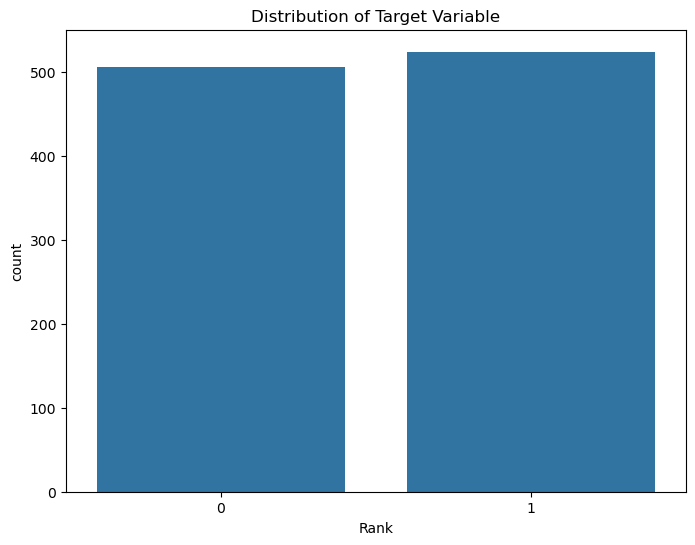

In [31]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Rank', data=df)  # Replace 'Target' with the actual target column name
plt.title('Distribution of Target Variable')
plt.show()

## Data Preparation

In [50]:
# Step 4: Data Preparation
# Step 1: Extract the feature columns and convert to NumPy array
X = df[feature_cols].values

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Extract the target column (labels)
y = df[target_name].values

# Step 4: Print the size of the feature matrix
print("Feature matrix size:", X_scaled.shape)

# Step 5: Check the shape of the target data
print("Target data shape:", y.shape)

Feature matrix size: (1030, 11)
Target data shape: (1030,)


## Divide into Training and Testing

In [51]:
np.random.seed(23)
random.seed(23)
# Step 5: Divide data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=23)

# Step 7: Train Random Forest and XGBoost models
xgb_model = XGBClassifier(random_state=11)
xgb_model.fit(X_train, y_train)

# Print the sizes of the datasets
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 721
Testing set size: 309


In [57]:
from xgboost import XGBClassifier

# Example of training the XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)  # Replace with your training data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

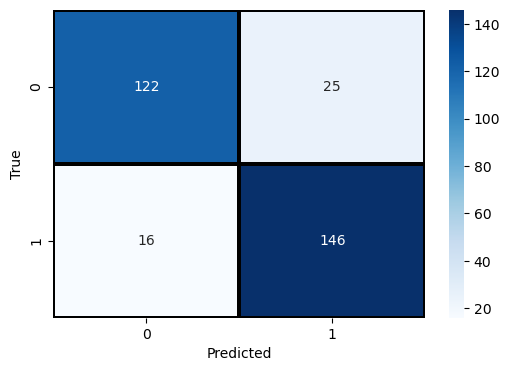

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Step 1: Predict labels for the test dataset
y_pred_1 = xgb_model.predict(X_test)

# Step 2: Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_1)

# Step 3: Create a heatmap for the confusion matrix with a color legend and black cell outlines
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_, 
            linecolor='black', linewidths=1.5)  # Add black outlines

plt.xlabel('Predicted')
plt.ylabel('True')

# Step 4: Save the figure with high resolution
plt.savefig("XGB_Confusion_matrix.png", dpi=300, bbox_inches='tight')

# Step 5: Display the plot
plt.show()

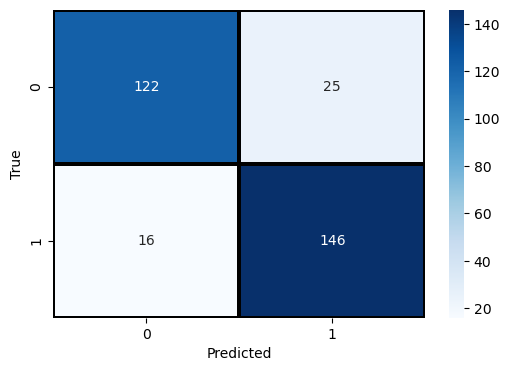

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Step 1: Predict labels for the test dataset
y_pred_1 = xgb_model.predict(X_test)

# Step 2: Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_1)

# Step 3: Create a heatmap for the confusion matrix with a color legend and black cell outlines
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_, 
            linecolor='black', linewidths=1.5)  # Add black outlines

plt.xlabel('Predicted')
plt.ylabel('True')

# Step 4: Save the figure with high resolution
plt.savefig("XGB_Confusion_matrix.png", dpi=300, bbox_inches='tight')

# Step 5: Display the plot
plt.show()

In [60]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, cohen_kappa_score, classification_report, confusion_matrix

# Step 7: Compute and print various evaluation metrics on test data
y_pred = xgb_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# ROC-AUC Score
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc}")

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

# Cohen's Kappa Score
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix to calculate Sensitivity and Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Sensitivity (Recall or True Positive Rate)
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity}")

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

Accuracy: 0.8673139158576052
ROC-AUC Score: 0.9474258839338204
F1 Score: 0.8670119276148913
Cohen's Kappa: 0.7332448992483103
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.86       147
           1       0.85      0.90      0.88       162

    accuracy                           0.87       309
   macro avg       0.87      0.87      0.87       309
weighted avg       0.87      0.87      0.87       309

Sensitivity: 0.9012345679012346
Specificity: 0.8299319727891157


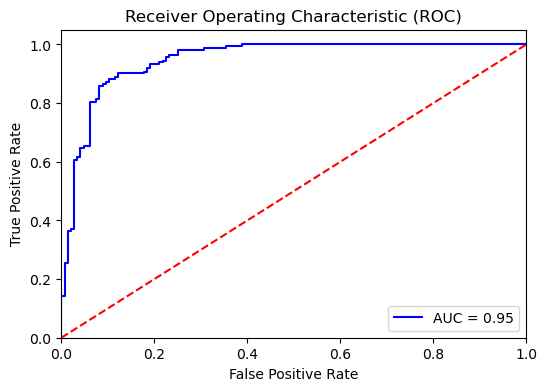

In [61]:
# Step 9: Plotting the ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line (random guessing line)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(False)

# Save the figure
plt.savefig("ROC-Flood_xgb1.png", dpi=300, bbox_inches='tight')

plt.show()

## Hyperparameter Tunning

In [40]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the hyperparameters and their ranges to search through
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200]
}

# Initialize the model
xgb_model = xgb.XGBClassifier()

# Use grid search to find the best combination of parameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=5)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Best parameters found by grid search
best_params = grid_search.best_params_
print(best_params)

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


In [45]:
np.random.seed(34)
random.seed(34)
# Step 5: Divide data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.40, random_state=34)

# Step 7: Train XGBoost models
xgb_model = XGBClassifier(random_state=11)
xgb_model.fit(X_train, y_train)

# Print the sizes of the datasets
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 618
Testing set size: 412


In [46]:
import xgboost as xgb

# Initialize the XGBoost model with a lower max_depth
model = xgb.XGBClassifier(max_depth=3)  # Set the max_depth to 3 (or any lower value)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

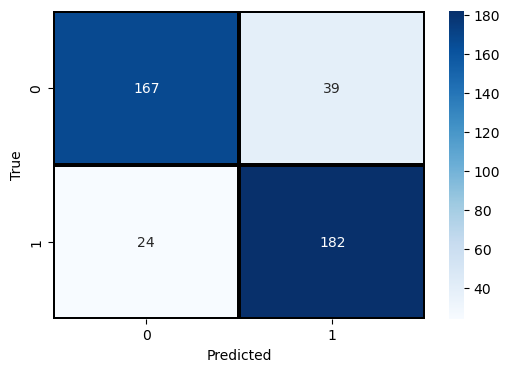

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Step 1: Predict labels for the test dataset
y_pred_1 = xgb_model.predict(X_test)

# Step 2: Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_1)

# Step 3: Create a heatmap for the confusion matrix with a color legend and black cell outlines
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_, 
            linecolor='black', linewidths=1.5)  # Add black outlines

plt.xlabel('Predicted')
plt.ylabel('True')

# Step 4: Save the figure with high resolution
plt.savefig("XGB_Confusion_matrix.png", dpi=300, bbox_inches='tight')

# Step 5: Display the plot
plt.show()

In [49]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, cohen_kappa_score, classification_report, confusion_matrix

# Step 7: Compute and print various evaluation metrics on test data
y_pred = xgb_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# ROC-AUC Score
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc}")

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

# Cohen's Kappa Score
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix to calculate Sensitivity and Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Sensitivity (Recall or True Positive Rate)
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity}")

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

Accuracy: 0.8470873786407767
ROC-AUC Score: 0.9170515599962297
F1 Score: 0.8468844200355123
Cohen's Kappa: 0.6941747572815534
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       206
           1       0.82      0.88      0.85       206

    accuracy                           0.85       412
   macro avg       0.85      0.85      0.85       412
weighted avg       0.85      0.85      0.85       412

Sensitivity: 0.883495145631068
Specificity: 0.8106796116504854


In [15]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training data
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='roc_auc')

# Display the cross-validation scores and mean
print(f'Cross-Validation AUC-ROC Scores: {cv_scores}')
print(f'Mean AUC-ROC: {cv_scores.mean()}')

Cross-Validation AUC-ROC Scores: [0.91223958 0.89947917 0.9421875  0.88597884 0.89748677]
Mean AUC-ROC: 0.9074743716931216


## Model Metrics and Performance

In [358]:
# List of SHAP values from the plot (replace with your actual SHAP values)
shap_values = [1.4, 1.2, 0.8, 0.77, 0.58, 0.44, 0.40, 0.38, 0.36, 0.25, 0.1]

# Total sum of SHAP values
total_shap = sum(shap_values)

# Normalized SHAP values (weights)
normalized_weights = [val / total_shap for val in shap_values]

# Print normalized weights
for feature, weight in zip(feature_cols, normalized_weights):
    print(f"{feature}: {weight:.2f}")

Curvature_: 0.21
Elevation_: 0.18
Drainage_Den: 0.12
Slope_R: 0.12
TWI_R: 0.09
Aspect_R: 0.07
Rainfall: 0.06
Population: 0.06
Formality_: 0.05
Housing_Den: 0.04
LULC: 0.01


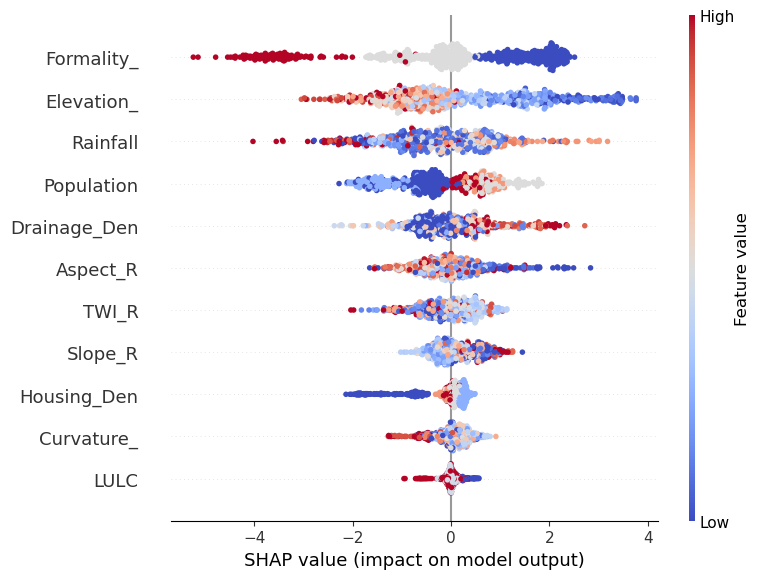

In [33]:
import shap
import xgboost as xgb

# Assuming xgb_model is your trained XGBoost model
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_train)

# Define the feature names (feature_cols)
feature_cols = ['Curvature_', 'Elevation_', 'Drainage_Den', 'Slope_R', 'TWI_R', 'Aspect_R', 
                'Rainfall', 'Population', 'Formality_', 'Housing_Den', 'LULC']

# SHAP Summary Plot for XGBoost with feature names
shap.summary_plot(shap_values_xgb, X_train, feature_names=feature_cols, cmap='coolwarm', show=False)
# Save the plot
plt.savefig("xgb_shapsum.png", dpi=300, bbox_inches='tight')


plt.show()

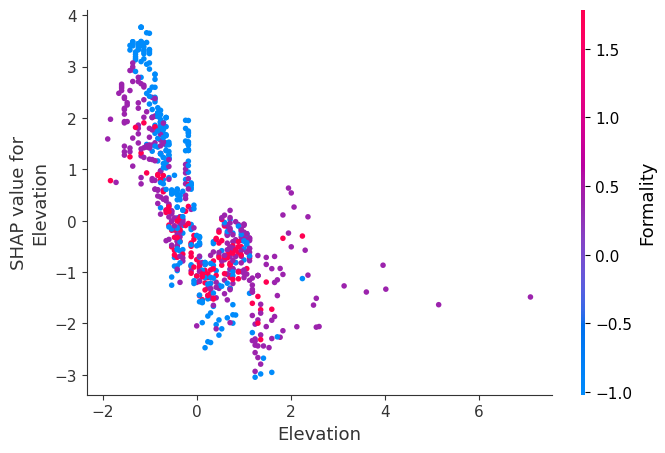

<Figure size 640x480 with 0 Axes>

In [40]:
import shap
import xgboost as xgb

# Assuming xgb_model is your trained XGBoost model and you have the feature columns
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_train)

# Define the feature names (make sure they match your data)
feature_cols = ['Curvature', 'Elevation', 'Drainage Density', 'Slope', 'TWI', 'Aspect', 
                'Rainfall', 'Population', 'Formality', 'Housing Density', 'LULC']

# SHAP Dependence Plot for XGBoost
# Ensure feature names match exactly: 'Elevation' and 'Drainage Density' (correct from feature_cols)
shap.dependence_plot('Elevation', shap_values_xgb, X_train, feature_names=feature_cols, interaction_index='Formality')

# Save the plot
plt.savefig("xgb_shap_dependence_plot.png", dpi=300, bbox_inches='tight')
plt.show()

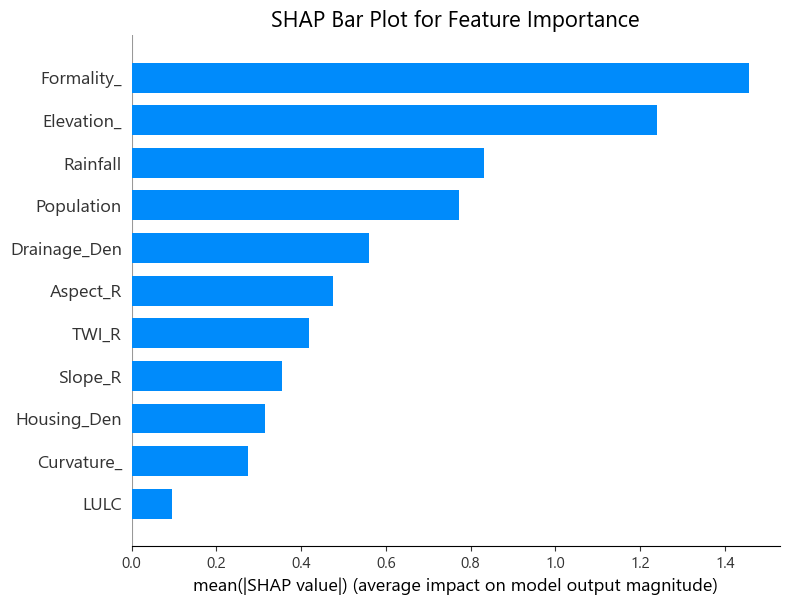

In [352]:
# Step 6: Plot SHAP Bar plot (global importance)
plt.figure(figsize=(6, 4))
shap.summary_plot(shap_values, X_train, feature_names=feature_cols, plot_type="bar", show=False)
plt.title("SHAP Bar Plot for Feature Importance", fontsize=16, color='black')
plt.savefig("SHAP Bar Plot.png", dpi=300, bbox_inches='tight')
plt.show()


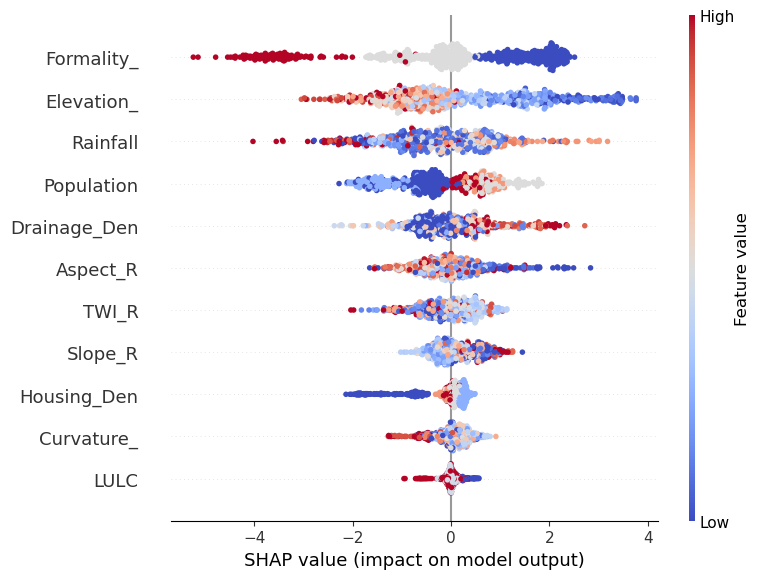

In [267]:
import shap
import xgboost as xgb

# Assuming xgb_model is your trained XGBoost model
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_train)

# Define the feature names (feature_cols)
feature_cols = ['Curvature_', 'Elevation_', 'Drainage_Den', 'Slope_R', 'TWI_R', 'Aspect_R', 
                'Rainfall', 'Population', 'Formality_', 'Housing_Den', 'LULC']

# SHAP Summary Plot for XGBoost with feature names
shap.summary_plot(shap_values_xgb, X_train, feature_names=feature_cols, cmap='coolwarm', show=False)
# Save the plot
plt.savefig("xgb_shapsum.png", dpi=300, bbox_inches='tight')


plt.show()

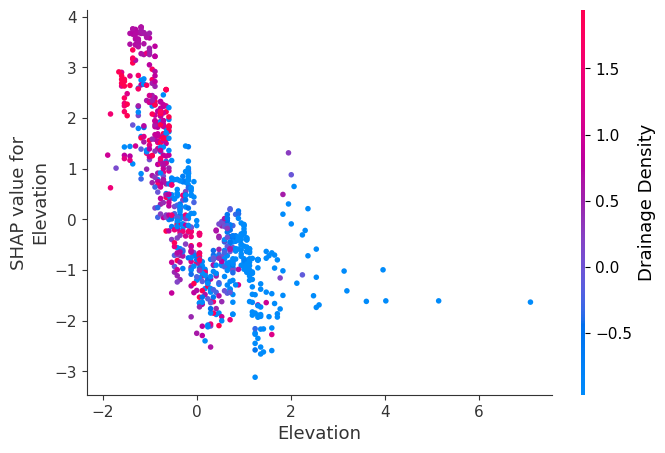

<Figure size 640x480 with 0 Axes>

In [271]:
import shap
import xgboost as xgb

# Assuming xgb_model is your trained XGBoost model and you have the feature columns
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_train)

# Define the feature names (make sure they match your data)
feature_cols = ['Curvature', 'Elevation', 'Drainage Density', 'Slope', 'TWI', 'Aspect', 
                'Rainfall', 'Population', 'Formality', 'Housing Density', 'LULC']

# SHAP Dependence Plot for XGBoost
# Ensure feature names match exactly: 'Elevation' and 'Drainage Density' (correct from feature_cols)
shap.dependence_plot('Elevation', shap_values_xgb, X_train, feature_names=feature_cols, interaction_index='Drainage Density')

# Save the plot
plt.savefig("xgb_shap_dependence_plot.png", dpi=300, bbox_inches='tight')
plt.show()

## Prediction and Mapping

In [296]:
# Step 1: Load the new dataset for prediction
new_data_file = r'C:\Users\MY HP\Desktop\ML_Prog\Fishgrid_Flood.csv' # Replacewith your new dataset file path
new_df = pd.read_csv(new_data_file)


In [297]:
new_df.head

<bound method NDFrame.head of      FID  Latitude  Longitude  Curvature_  Elevation_  Drainage_Den   Slope_R  \
0      0   10.2467    9.75909    0.425860         636      0.000000  2.381790   
1      1   10.2467    9.76365    0.425860         637      0.000000  0.738945   
2      2   10.2466    9.76822   -0.212930         629      0.000000  0.660940   
3      3   10.2466    9.77279   -0.106465         624      0.007416  1.191410   
4      4   10.2466    9.77735   -0.638790         619      1.011800  3.762690   
..   ...       ...        ...         ...         ...           ...       ...   
653  653   10.3729    9.91467   -0.319395         568      0.000000  2.312140   
654  654   10.3776    9.83248   -0.638790         572      0.702505  1.401850   
655  655   10.3776    9.83704    0.212930         569      0.752718  3.554860   
656  656   10.3774    9.90098    0.000000         569      0.000000  1.651960   
657  657   10.3774    9.90555    0.319395         580      0.000000  0.738945  

In [298]:
# Step 2: Select the features for prediction
X_new = new_df.loc[:, feature_cols] # Ensure the new data has the correct␣feature columns
# Step 3: Convert features to a NumPy array
X_new = np.asarray(X_new)
# Step 4: Standardize the new data using the previously fitted scaler
scaler = preprocessing.StandardScaler().fit(X_new)
X_scaled_new = scaler.transform(X_new)
y = df[target_name]

In [299]:
#Step 5: Get prediction probabilities on the new data using the trained model
probabilities = xgb_model.predict_proba(X_new)
# Step 6: Add the probabilities to the new DataFrame
# For binary classification, probabilities will have two columns: [P(class 0),␣P(class 1)]
new_df['Probability_Class_0'] = probabilities[:, 0] # Probability of class 0
new_df['Probability_Class_1'] = probabilities[:, 1] # Probability of class 1

In [300]:
# Step 7: Save the results (with probabilities) to a CSV file
output_file = r'C:\Users\MY HP\Desktop\ML_Prog\Fishgrid_GXB_Probabilities.csv' # Replace with your output file path
new_df.to_csv(output_file, index=False)
# Step 8: Print confirmation that the predictions have been saved
print(f"Predictions with probabilities saved to {output_file}")

Predictions with probabilities saved to C:\Users\MY HP\Desktop\ML_Prog\Fishgrid_GXB_Probabilities.csv


In [19]:
# Assuming `new_df` is your new data with the same features as during training
X_new = new_df[feature_cols].values  # Extract the features for prediction

# Use the previously fitted scaler (from the training phase) to transform the new data
X_new_scaled = scaler.transform(X_new)  # Important: Do NOT fit again, just transform

# Now you can make predictions on the scaled new data
probabilities = xgb_model.predict_proba(X_new_scaled)

# Add the predicted probabilities back to your new DataFrame
new_df['Probability_Class_0'] = probabilities[:, 0]  # Probability of no flood (class 0)
new_df['Probability_Class_1'] = probabilities[:, 1]  # Probability of flood (class 1)

# You can also add the predicted class based on a threshold (e.g., 0.5)
new_df['Predicted_Class'] = (new_df['Probability_Class_1'] > 0.5).astype(int)

# Save or visualize the results
output_file = r'C:\Users\MY HP\Desktop\ML_Prog\Flood_Probabilities_xgb.csv'
new_df.to_csv(output_file, index=False)
print(f"Predictions with probabilities saved to {output_file}")

Predictions with probabilities saved to C:\Users\MY HP\Desktop\ML_Prog\Flood_Probabilities_xgb.csv


## Support Vector Machin

In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, cohen_kappa_score, f1_score, roc_curve, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

## Data Visualization

In [72]:
# Step 2: Read and Visualize Data
data_file = r'C:\Users\MY HP\Desktop\ML_Prog\Flood_Features_Real.csv'  # Adjust your data file path
df = pd.read_csv(data_file)

# Visualize basic pairplot for feature distributions
df = pd.read_csv(data_file)  # Read the CSV file into a pandas DataFrame
df = df.reindex(np.random.permutation(df.index))  # Shuffle the rows of the dataset randomly
df.tail()

,ID,X_lon,Y_lat,Rank,Curvature_,Elevation_,Drainage_Den,Slope_R,TWI_R,Aspect_R,Rainfall,Population,Formality_,Housing_Den,LULC
788,789,9.792663,10.253481,0,0.106465,616,0.71368,1.77914,6.89441,293.199,1013.080,2,2,1,25
281,282,9.861366,10.332551,1,0.212930,624,0.00000,3.31762,6.27049,320.711,947.828,3,2,2,12
595,596,9.835906,10.352460,0,0.532325,602,0.00000,1.04497,7.42676,243.435,947.879,2,3,1,12
200,201,9.858196,10.361966,1,0.106465,602,0.00000,1.77914,6.89441,203.199,944.035,1,1,3,25
896,897,9.844623,10.369463,0,-0.532325,585,0.00000,1.92631,6.81487,75.964,943.009,2,2,1,25


In [73]:
df.columns

Index(['ID', 'X_lon', 'Y_lat', 'Rank', 'Curvature_', 'Elevation_',
       'Drainage_Den', 'Slope_R', 'TWI_R', 'Aspect_R', 'Rainfall',
       'Population', 'Formality_', 'Housing_Den', 'LULC'],
      dtype='object')

In [74]:
# Step 3: Define Features and Output
feature_cols = [
    'Curvature_', 'Elevation_', 'Drainage_Den', 'Slope_R', 'TWI_R', 'Aspect_R',
    'Rainfall', 'Population', 'Formality_', 'Housing_Den', 'LULC'
]
X = df[feature_cols]
y = df['Rank']  # Target variable

## Data Preparation

In [75]:
# Step 4: Data Preparation
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the size of the feature matrix
print("Size of X (features):", X_scaled.shape)

# Step 2: Check the shape of the target data
print("Size of y (target):", y.shape)  # Print the size of the target data

Size of X (features): (1030, 11)
Size of y (target): (1030,)


In [76]:
# Step 5: Split Data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=39)

# Print the sizes of the datasets
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 721
Testing set size: 309


## Train SVM 

In [77]:
# Step 6.1: Import necessary libraries
from sklearn.svm import SVC

# Step 6.2: Train the SVM Model
svm_model = SVC(probability=True, kernel='linear', random_state=39)
svm_model.fit(X_train, y_train)

# Print a confirmation message
print("SVM model trained successfully.")

SVM model trained successfully.


## Hyperparameter Tunning

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Create an SVM model
svm = SVC()

# Define a grid of hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10],                # Regularization parameter
    'kernel': ['linear', 'rbf'],       # Kernel type
    'gamma': [0.001, 0.01, 0.1],      # Kernel coefficient
    'degree': [2, 3, 4],              # Only used with 'poly' kernel
    'coef0': [0, 1]                   # Independent term in kernel function for 'poly' and 'sigmoid'
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='roc_auc')

# Fit the model to your data
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 10, 'coef0': 0, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}


## COmpute Evaluation Metrics

In [205]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, cohen_kappa_score, classification_report, confusion_matrix

# Step 7: Compute and print various evaluation metrics on test data
y_pred = svm_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# ROC-AUC Score
y_pred_prob = svm_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc}")

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

# Cohen's Kappa Score
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix to calculate Sensitivity and Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Sensitivity (Recall or True Positive Rate)
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity}")

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

Accuracy: 0.7637540453074434
ROC-AUC Score: 0.8425190194420964
F1 Score: 0.7638238984889738
Cohen's Kappa: 0.5236013432173858
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74       140
           1       0.79      0.78      0.78       169

    accuracy                           0.76       309
   macro avg       0.76      0.76      0.76       309
weighted avg       0.76      0.76      0.76       309

Sensitivity: 0.7810650887573964
Specificity: 0.7428571428571429


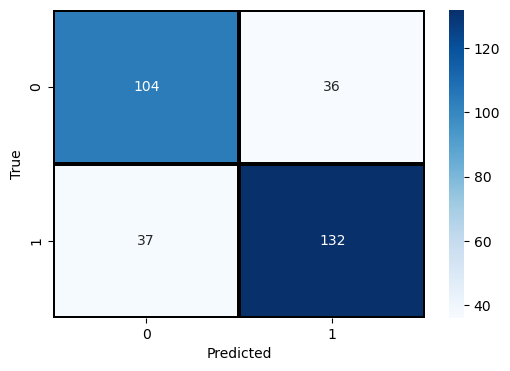

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Step 1: Predict labels for the test dataset
y_pred_1 = svm_model.predict(X_test)

# Step 2: Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_1)

# Step 3: Create a heatmap for the confusion matrix with a color legend and black cell outlines
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=svm_model.classes_, yticklabels=svm_model.classes_, 
            linecolor='black', linewidths=1.5)  # Add black outlines

plt.xlabel('Predicted')
plt.ylabel('True')

# Step 4: Save the figure with high resolution
plt.savefig("SVM_Confusion_matrix.png", dpi=300, bbox_inches='tight')

# Step 5: Display the plot
plt.show()

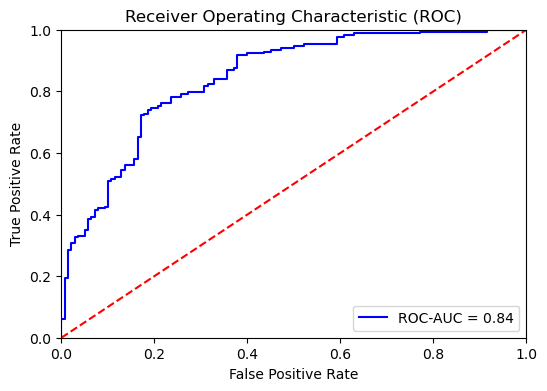

In [207]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='b', label=f'ROC-AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## Prediction and MApping

In [351]:
# Step 1: Load the new dataset for prediction
new_data_file = r'C:\Users\MY HP\Desktop\ML_Prog\Fishgrid_Flood.csv' # Replacewith your new dataset file path
new_df = pd.read_csv(new_data_file)

In [ ]:
# Assuming `new_df` is your new data with the same features as during training
X_new = new_df[feature_cols].values  # Extract the features for prediction

# Use the previously fitted scaler (from the training phase) to transform the new data
X_new_scaled = scaler.transform(X_new)  # Important: Do NOT fit again, just transform
# Now you can make predictions on the scaled new data
probabilities = svm_model.predict_proba(X_new_scaled)

In [ ]:
# Add the predicted probabilities back to your new DataFrame
new_df['Probability_Class_0'] = probabilities[:, 0]  # Probability of no flood (class 0)
new_df['Probability_Class_1'] = probabilities[:, 1]  # Probability of flood (class 1)

# You can also add the predicted class based on a threshold (e.g., 0.5)
new_df['Predicted_Class'] = (new_df['Probability_Class_1'] > 0.5).astype(int)

In [27]:
# Save or visualize the results
output_file = r'C:\Users\MY HP\Desktop\ML_Prog\Flood_Probabilities_svm.csv'
new_df.to_csv(output_file, index=False)
print(f"Predictions with probabilities saved to {output_file}")

Predictions with probabilities saved to C:\Users\MY HP\Desktop\ML_Prog\Flood_Probabilities_svm.csv
